# 1) Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.manifold import TSNE

warnings.filterwarnings("ignore")

# 2) Coleta dos Dados

In [2]:
df = pd.read_csv(r'../Dados/Tabela_final/tabela_final.csv').drop(columns = 'Unnamed: 0')
df

,IBGE7,UF,NOME,LATITUDE,LONGITUDE,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,DOCSUP_EF_PUB,...,IDH,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,QUAL_MED_AGUA,DIST_CORPO_AGUA,TRANSPORT_COST
0,2700300,AL,ARAPIRACA,-9.75487,-36.6615,28.006125,42.522954,4.658296,3.683754,54.40,...,0.649,82.16,30.83,97.38,99.56,12.38,0.96,62.439167,42.035186,24042.166072
1,2700706,AL,BATALHA,-9.67420,-37.1330,30.831978,36.687844,4.495362,3.590319,12.62,...,0.594,58.61,41.21,88.09,98.93,18.22,5.50,65.300843,24.642419,24257.110578
2,2700904,AL,BELO MONTE,-9.82272,-37.2770,34.847867,52.813493,4.083426,3.171860,27.12,...,0.517,36.42,39.22,99.16,97.68,17.30,12.01,65.300843,3.297594,24226.863743
3,2701209,AL,CACIMBINHAS,-9.40121,-36.9911,38.654232,43.228540,4.104964,3.317861,49.04,...,0.531,18.47,32.14,87.36,98.30,60.86,8.89,65.300843,58.541833,24358.206538
4,2701605,AL,CANAPI,-9.11932,-37.5967,31.898935,36.839351,4.667102,3.633118,20.84,...,0.506,18.20,44.21,93.07,96.97,40.57,2.52,66.893107,68.942666,24734.221802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2806008,SE,RIBEIRÓPOLIS,-10.53570,-37.4380,32.467580,40.276968,4.230984,3.565478,64.68,...,0.613,80.88,19.75,98.78,99.49,14.85,3.47,64.911294,1.388835,23891.778664
1257,2807006,SE,SÃO MIGUEL DO ALEIXO,-10.38470,-37.3836,32.107015,47.482277,3.915938,3.184283,62.08,...,0.567,61.09,28.75,95.20,99.04,24.96,10.33,64.911294,16.508752,23954.902605
1258,2807105,SE,SIMÃO DIAS,-10.73870,-37.8097,35.640213,43.864958,4.286000,3.467918,61.38,...,0.604,60.38,24.58,97.96,98.62,30.64,4.38,65.088090,2.685846,23918.838452
1259,2807303,SE,TELHA,-10.20640,-36.8818,29.921124,45.640696,4.361086,3.524588,45.66,...,0.604,89.06,31.18,99.05,99.44,5.01,2.05,64.553680,4.298665,23869.921712


# 2) Análise Exploratória

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IBGE7                1261 non-null   int64  
 1   UF                   1261 non-null   object 
 2   NOME                 1261 non-null   object 
 3   LATITUDE             1261 non-null   float64
 4   LONGITUDE            1261 non-null   float64
 5   DIST_EF_PUB          1261 non-null   float64
 6   DIST_EM_PUB          1261 non-null   float64
 7   IDEB_AI              1261 non-null   float64
 8   IDEB_AF              1261 non-null   float64
 9   DOCSUP_EF_PUB        1261 non-null   float64
 10  DOCSUP_EM_PUB        1261 non-null   float64
 11  TXNASC7C             1261 non-null   float64
 12  TXNBAIXOP            1261 non-null   float64
 13  PINTERSAP            1261 non-null   float64
 14  PINTERDRSAI          1261 non-null   float64
 15  REN_PIBPC_D          1261 non-null   f

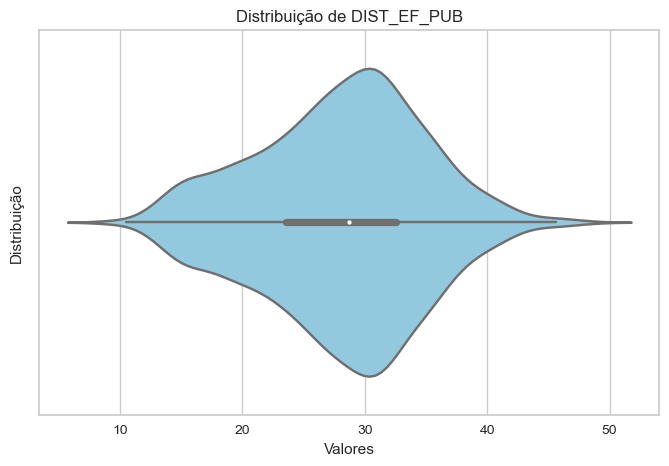

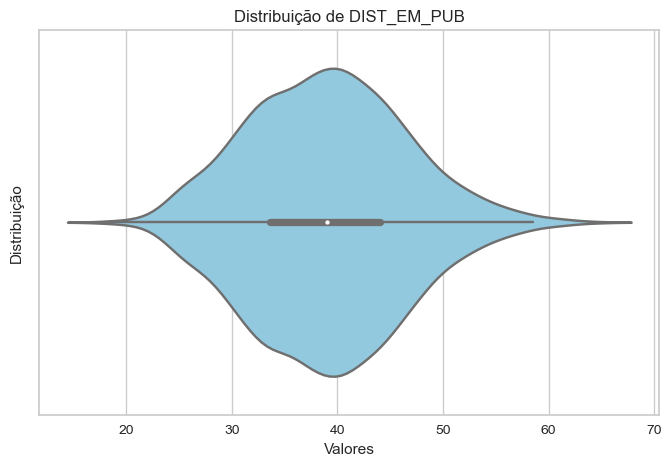

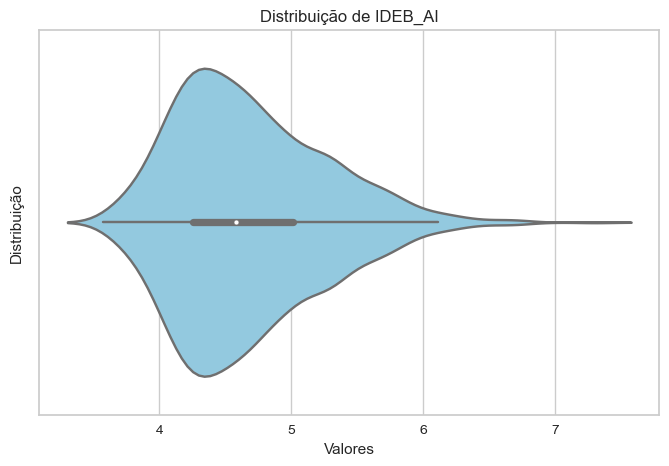

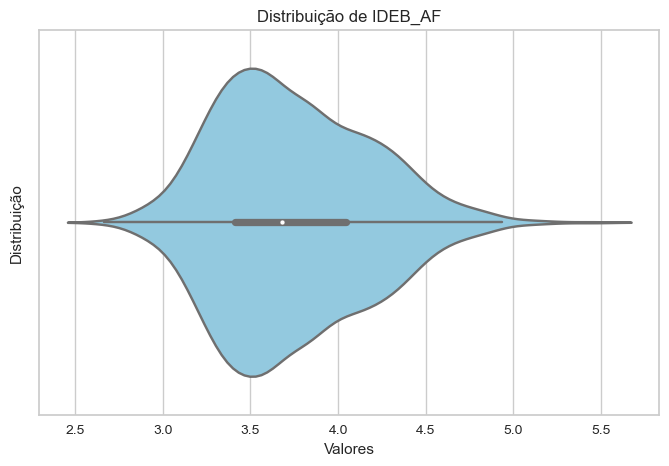

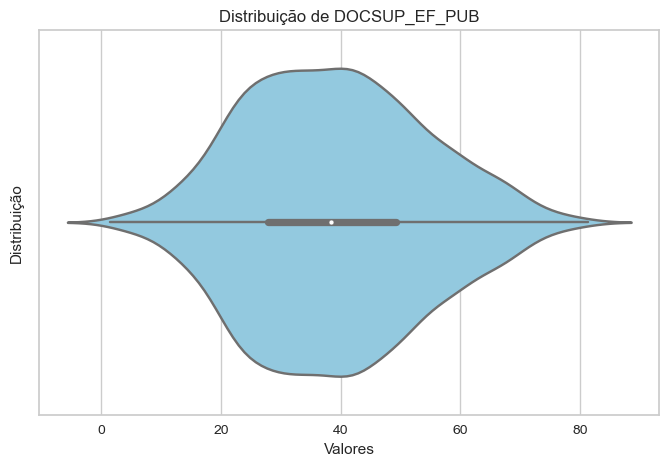

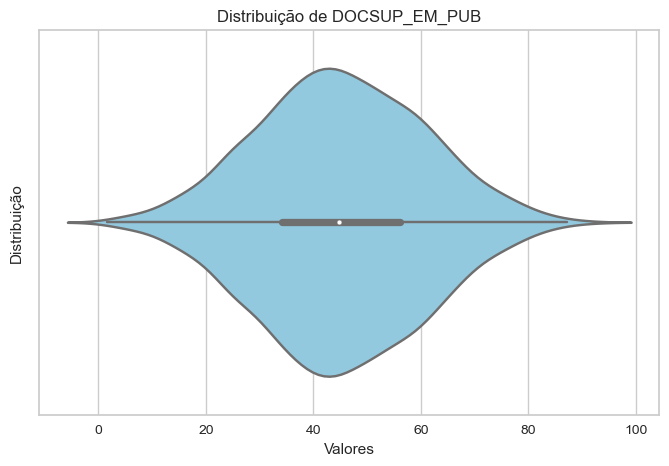

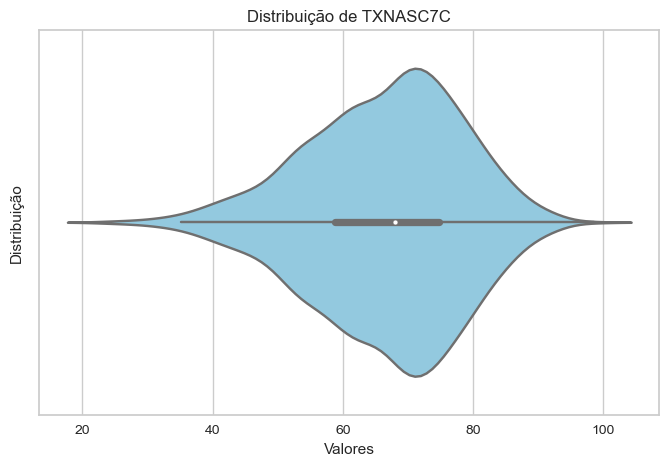

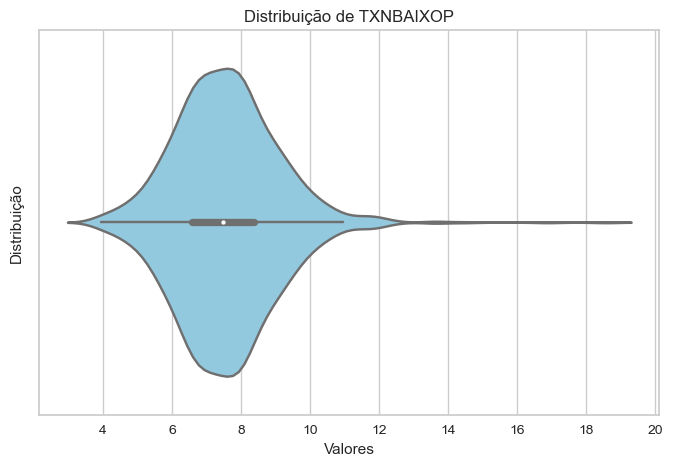

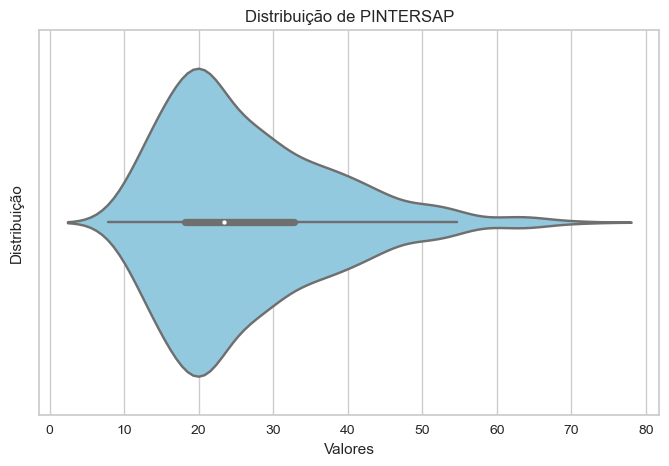

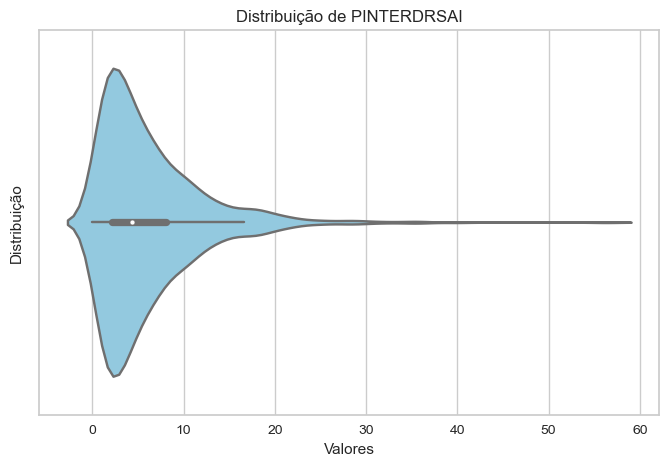

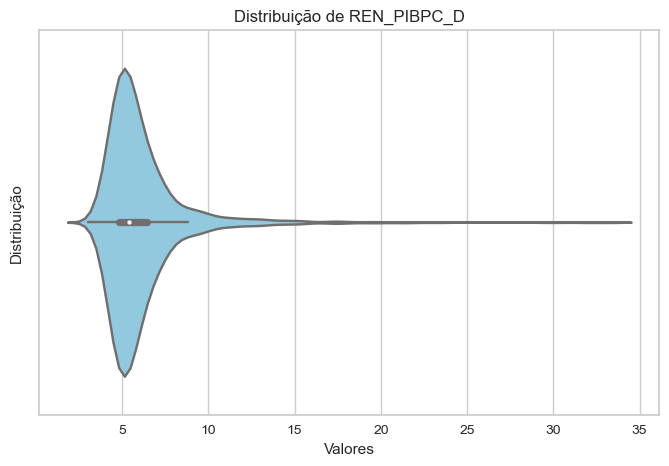

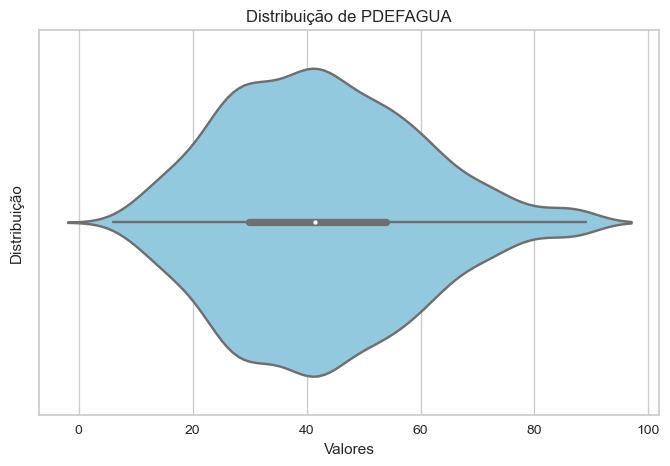

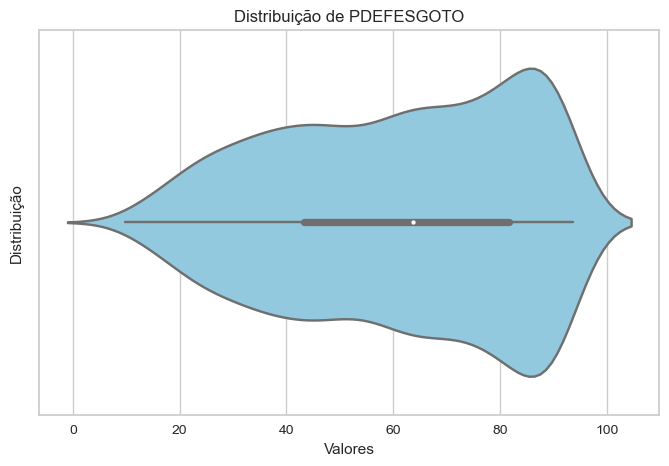

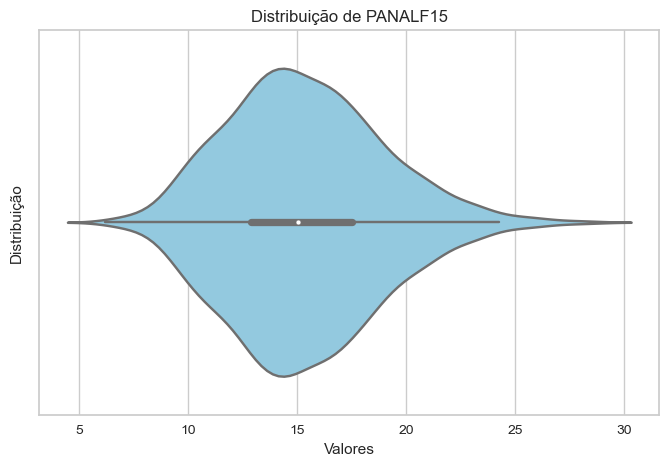

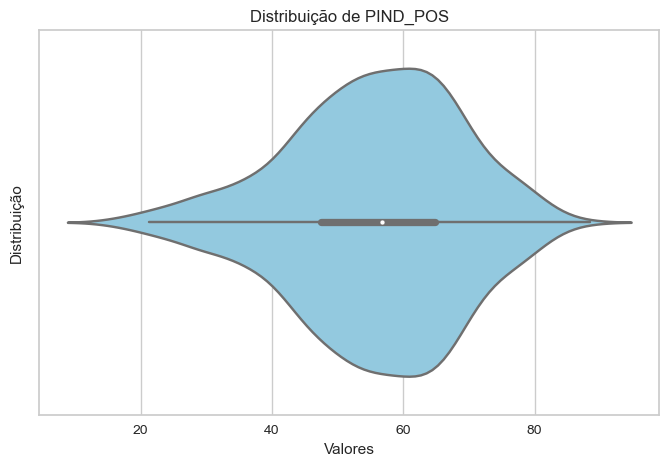

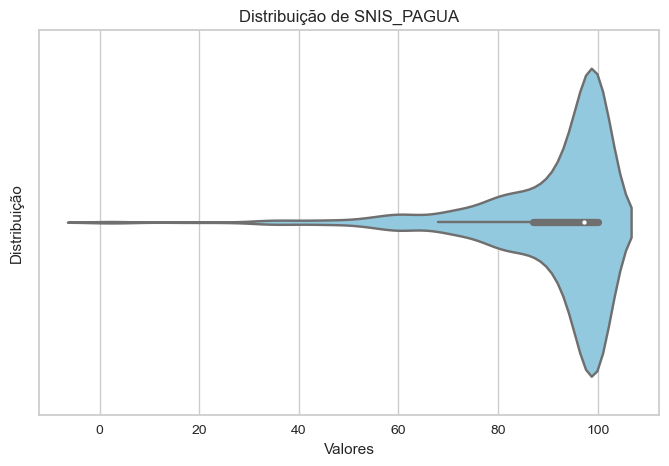

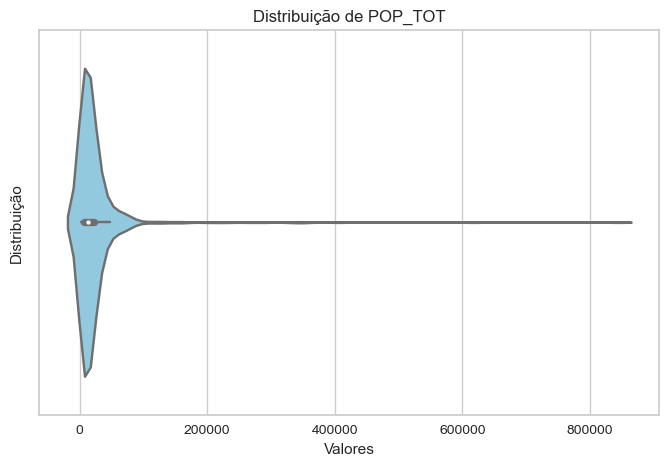

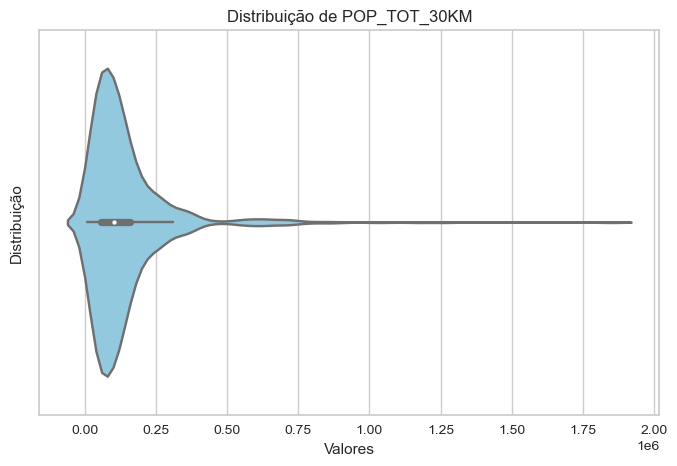

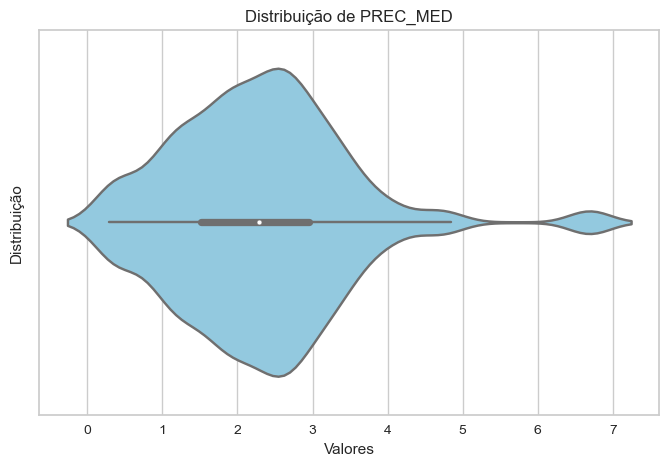

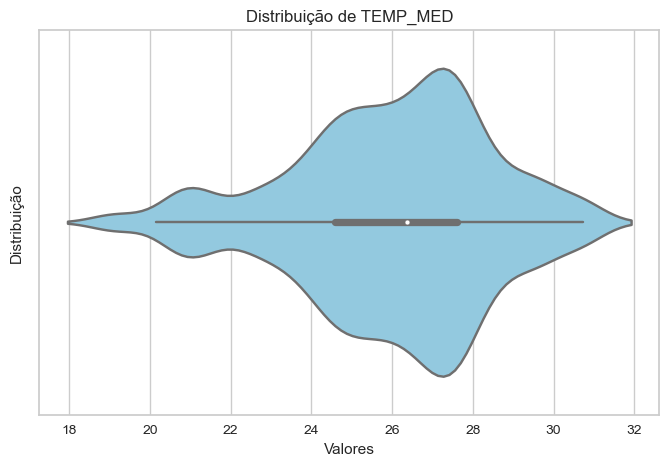

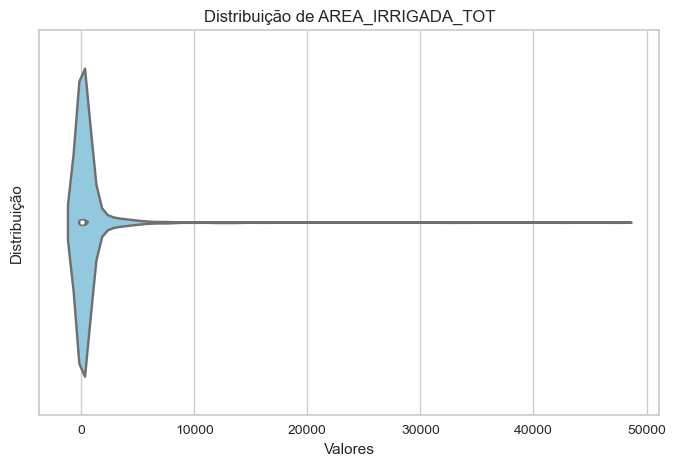

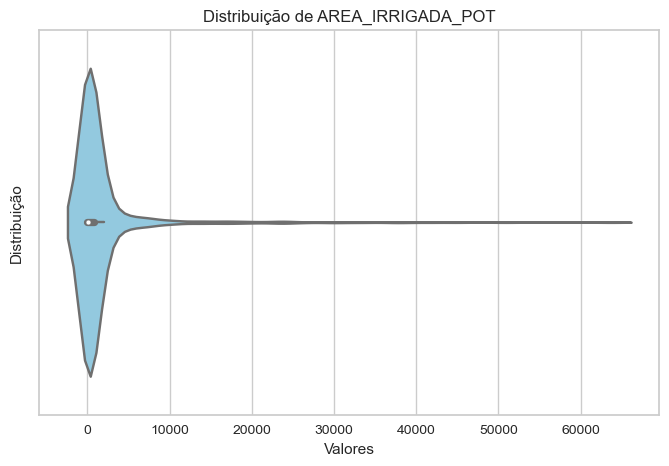

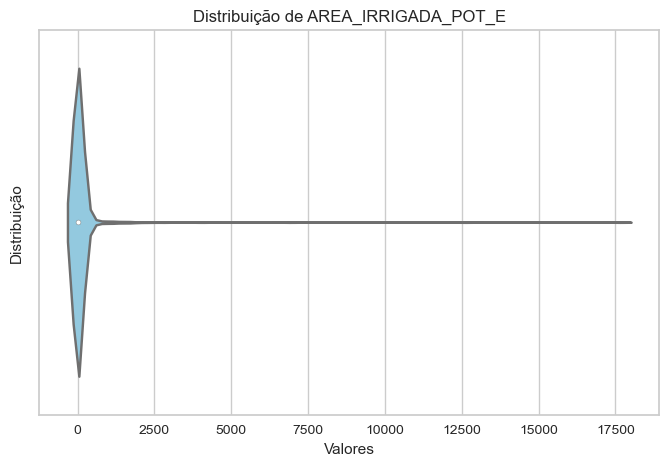

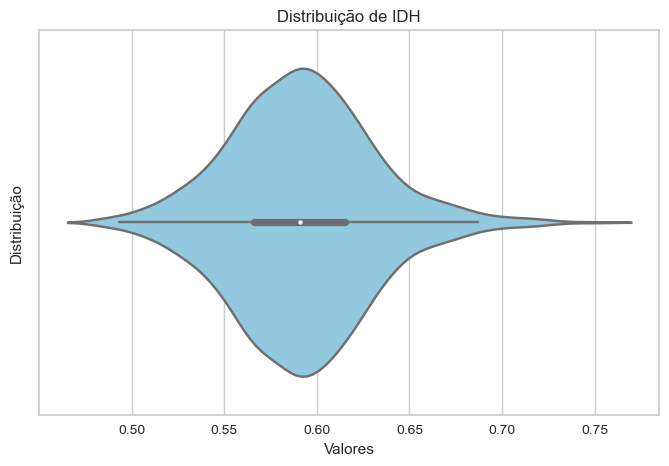

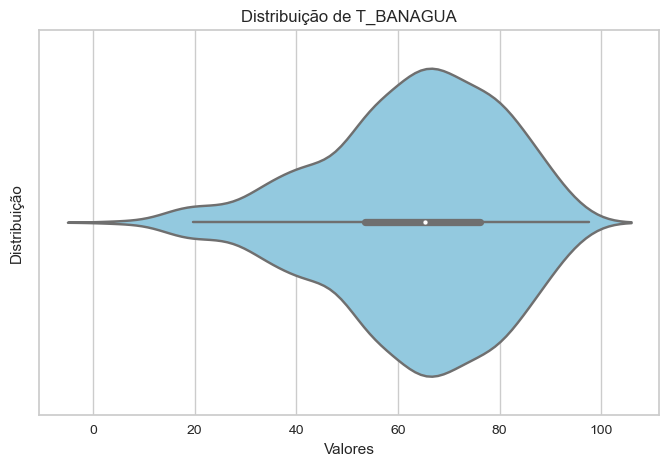

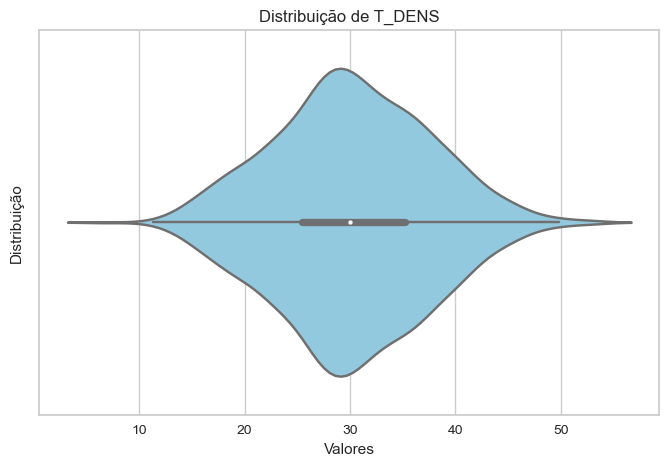

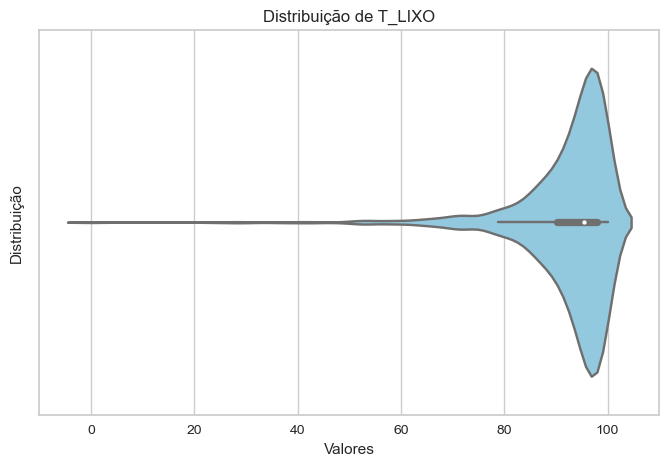

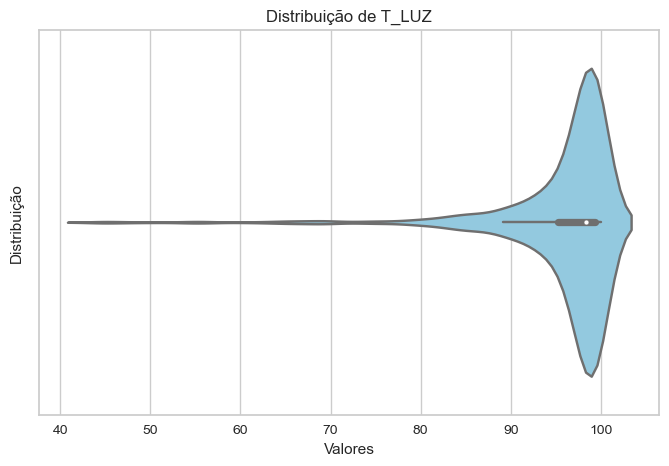

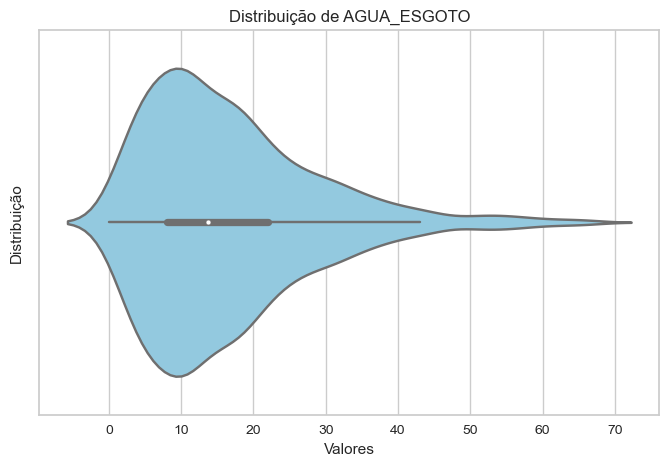

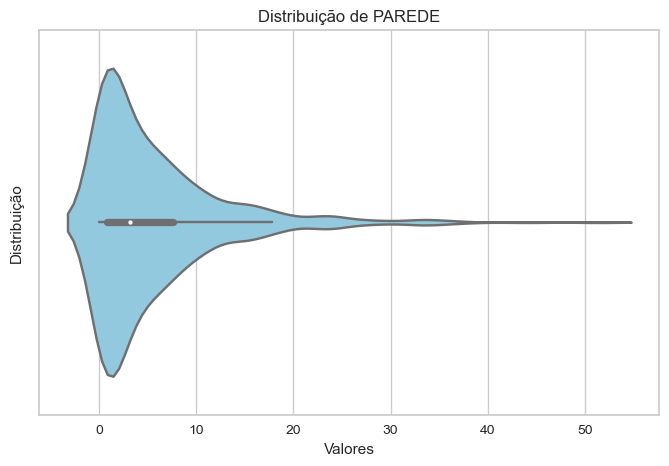

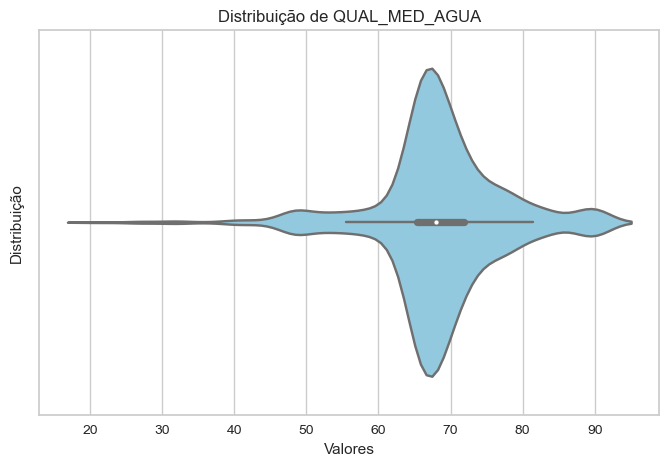

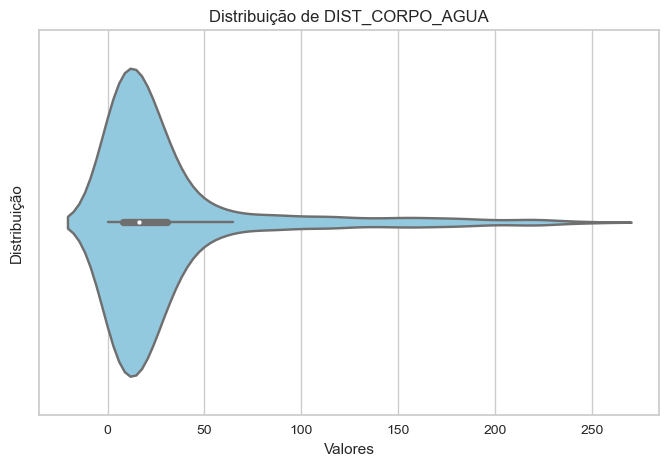

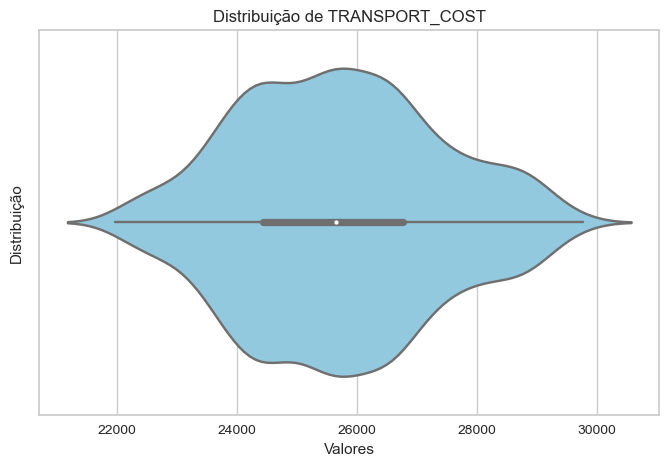

In [4]:
columns = [coluna for coluna in df.columns if (df[coluna].dtype == 'float64')&(coluna not in ['LATITUDE', 'LONGITUDE'])]

for column in columns:
    plt.figure(figsize=(8, 5))  # Ajuste o tamanho da figura conforme necessário
    sns.violinplot(x=df[column], color='skyblue')
        
    # Ajuste o nome dos eixos e o título
    plt.xlabel('Valores')  # Nome do eixo X
    plt.ylabel('Distribuição')  # Nome do eixo Y
    plt.title(f'Distribuição de {column}')  # Título do gráfico
        
    # Exiba o plot
    plt.show()

# 3) Redução da dimensinalidade

## 3.1) Pré-processamento

In [5]:
df_pp = df[columns].copy()
scaler = StandardScaler()
df_pp[columns] = scaler.fit_transform(df_pp[columns])
df_pp

,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,DOCSUP_EF_PUB,DOCSUP_EM_PUB,TXNASC7C,TXNBAIXOP,PINTERSAP,PINTERDRSAI,...,IDH,T_BANAGUA,T_DENS,T_LIXO,T_LUZ,AGUA_ESGOTO,PAREDE,QUAL_MED_AGUA,DIST_CORPO_AGUA,TRANSPORT_COST
0,-0.003596,0.477716,-0.031177,-0.136700,1.033581,0.765998,-0.532485,1.685893,-0.685158,0.128926,...,1.475624,1.087767,0.086309,0.544792,0.539082,-0.358608,-0.688153,-0.672664,0.255271,-1.001432
1,0.414315,-0.313415,-0.317830,-0.351283,-1.763812,-0.205948,-0.964248,-0.197712,0.384794,1.067828,...,0.062003,-0.275109,1.501582,-0.432130,0.449082,0.131455,-0.015139,-0.352958,-0.144744,-0.872378
2,1.008218,1.872920,-1.042553,-1.312313,-0.792960,-0.859520,-1.068230,0.337805,-0.538813,0.112658,...,-1.917065,-1.559279,1.230253,0.731974,0.270511,0.054253,0.949910,-0.352958,-0.635652,-0.890539
3,1.571136,0.573380,-1.004661,-0.977009,0.674700,0.006301,-1.181960,-0.570155,-0.808078,-0.710353,...,-1.557235,-2.598074,0.264922,-0.508896,0.359082,3.709585,0.487398,-0.352958,0.634906,-0.811680
4,0.572105,-0.292874,-0.015685,-0.252989,-1.213439,-0.827165,-1.153605,0.414165,-1.187008,-0.779535,...,-2.199789,-2.613700,1.910621,0.091559,0.169083,2.006952,-0.456897,-0.175071,0.874114,-0.585918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.656201,0.173203,-0.782952,-0.408333,1.721881,2.080907,0.620449,-0.459130,-1.543416,-1.037705,...,0.550345,1.013692,-1.424407,0.692013,0.529082,-0.151338,-0.316068,-0.396479,-0.679552,-1.091726
1257,0.602878,1.150107,-1.337217,-1.283783,1.547797,1.375567,-0.934516,0.650083,-0.866091,-0.777173,...,-0.631956,-0.131587,-0.197291,0.315546,0.464796,0.697041,0.700865,-0.396479,-0.331810,-1.053826
1258,1.125397,0.659667,-0.686162,-0.632387,1.500929,2.448461,-1.040046,-0.074479,-0.538950,-0.932730,...,0.319025,-0.172676,-0.765855,0.605783,0.404797,1.173678,-0.181169,-0.376727,-0.649722,-1.075479
1259,0.279610,0.900423,-0.554063,-0.502240,0.448391,1.722413,-0.589257,-0.145111,-1.233405,-0.962682,...,0.319025,1.487081,0.134030,0.720406,0.521939,-0.977061,-0.526571,-0.436431,-0.612629,-1.104849


## 3.2) Aplicação do PCA

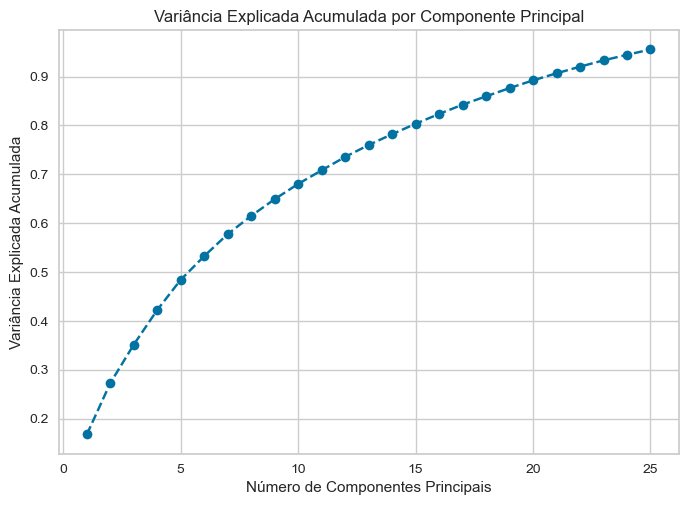

In [6]:
# Aplicar o PCA
pca = PCA(n_components = 0.95)
df_pp = pca.fit_transform(df_pp)

# Calcular a variância explicada para cada componente principal
variancia_explicada = pca.explained_variance_ratio_

# Plotar a variância explicada acumulada
variancia_acumulada = np.cumsum(variancia_explicada)
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.show()

## 3.3) Análise de Cluster

In [7]:
tsne = TSNE(n_components=2, random_state=42)
df_components = tsne.fit_transform(df_pp)
df_components = pd.DataFrame(df_components)
df_components.columns = ['COMPONENT1', 'COMPONENT2']

def plot(df, df_components, clusters):
    df = pd.concat([df, df_components], axis = 1)
    df_components['CLUSTER'] = clusters

    actual_cities = df[['NOME', 'COMPONENT1', 'COMPONENT2', 'CLUSTER']].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='COMPONENT1', y='COMPONENT2', hue='CLUSTER', palette='Set2')
    sns.scatterplot(data=actual_cities, x='COMPONENT1', y='COMPONENT2', marker = 'X', color='black', s=100, label='Cidades atuais')
    for i, row in actual_cities.iterrows():
        plt.text(row['COMPONENT1'] + 0.1, row['COMPONENT2'], row['NOME'], fontsize=12)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Visualização dos Clusters')
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True)
    plt.show()

### 3.3.1) Hierarchical Clustering

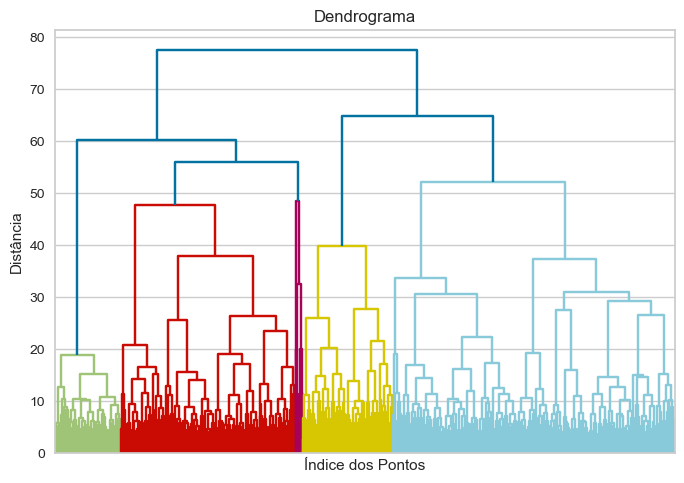

In [8]:
linkage_matrix = linkage(df_pp, method='ward')

plt.figure()
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.xticks([])
plt.xlabel('Índice dos Pontos')
plt.ylabel('Distância')
plt.show()

Silhouette Score:  0.0651
Davies-Bouldin Score:  2.3796
Calinski-Harabasz Index:  82.7666


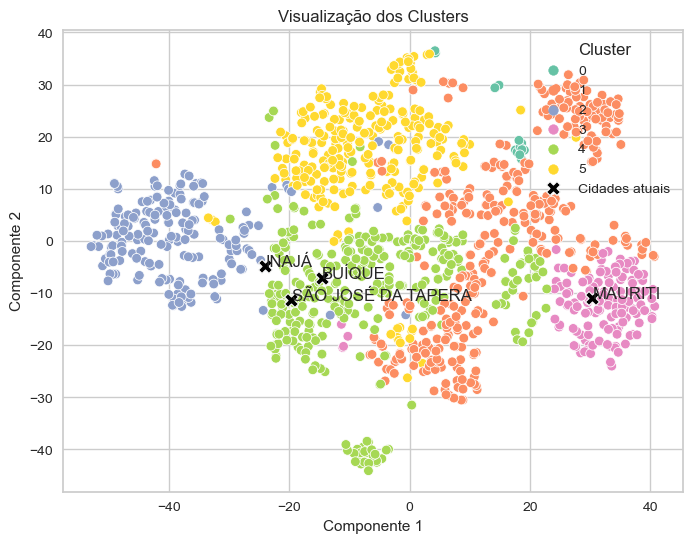

In [9]:
hclustering = AgglomerativeClustering(n_clusters=6)
clusters = hclustering.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, clusters),4))
plot(df, df_components, clusters)

### 3.3.2) K-Means

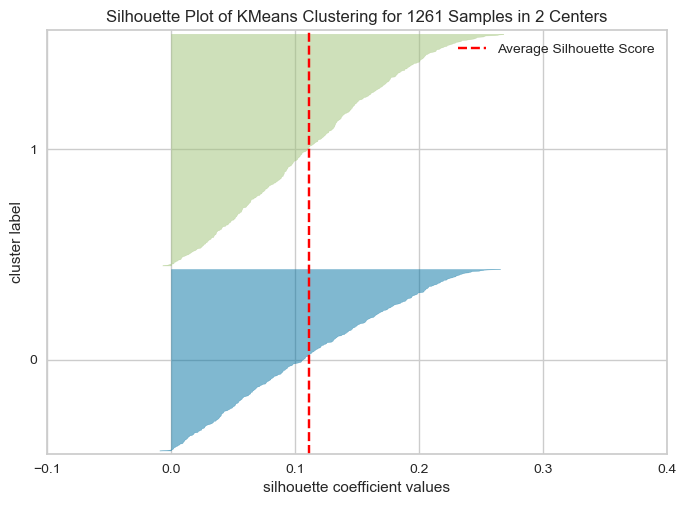

In [10]:
best_score = -1  
best_n_clusters = 0  
for n_clusters in range(2,13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_pp)
    score = silhouette_score(df_pp, clusters)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        
silhouette_visualizer(KMeans(best_n_clusters, random_state=42), df_pp, colors='yellowbrick')
plt.show()

Silhouette Score:  0.1114
Davies-Bouldin Score:  2.6218
Calinski-Harabasz Index:  158.1092


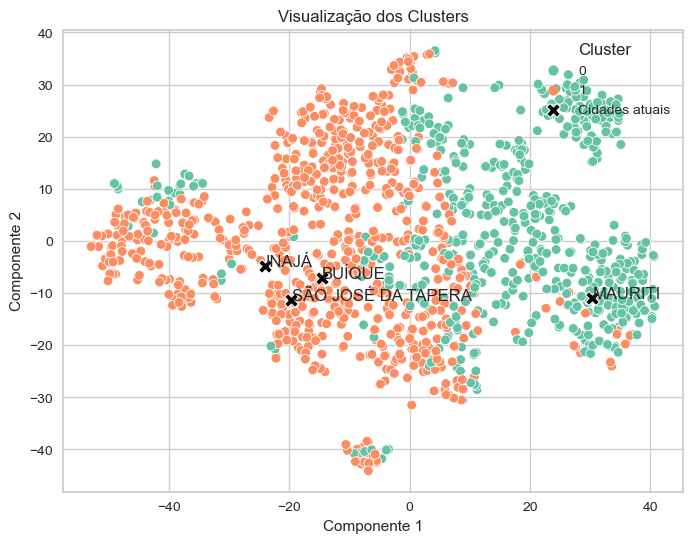

In [11]:
kmeans = KMeans(2, random_state = 42)
clusters = kmeans.fit_predict(df_pp)
print('Silhouette Score: ',round(silhouette_score(df_pp, clusters),4))
print('Davies-Bouldin Score: ',round(davies_bouldin_score(df_pp, clusters),4))
print('Calinski-Harabasz Index: ',round(calinski_harabasz_score(df_pp, clusters),4))
plot(df, df_components, clusters)

## 3.4) Seleção dos municípios com maior potencial

In [37]:
actual_cities = df[
    ['NOME', 'UF', 'IDH','POP_TOT', 'POP_TOT_30KM', 'CLUSTER', 'AREA_IRRIGADA_POT_E', 'TRANSPORT_COST','REN_PIBPC_D', 'PANALF15']
].loc[df['NOME'].isin(['MAURITI', 'SÃO JOSÉ DA TAPERA', 'BUÍQUE', 'INAJÁ'])]

actual_cities.describe()

,IDH,POP_TOT,POP_TOT_30KM,CLUSTER,AREA_IRRIGADA_POT_E,TRANSPORT_COST,REN_PIBPC_D,PANALF15
count,4.000000,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.000000
mean,0.545500,39195.400000,189251.950000,0.75,10.614900,25084.426059,4.902736,21.393658
std,0.039711,15208.684352,67296.328282,0.50,21.229801,732.351915,0.404578,4.563981
min,0.523000,21917.000000,89734.800000,0.00,0.000000,24412.742090,4.552523,16.872832
25%,0.526000,29673.350000,177920.250000,0.75,0.000000,24745.775115,4.553479,17.902244
50%,0.527000,39181.100000,216436.800000,1.00,0.000000,24899.285302,4.886324,21.152343
75%,0.546500,48703.150000,227768.500000,1.00,10.614900,25237.936246,5.235580,24.643757
max,0.605000,56502.400000,234399.400000,1.00,42.459601,26126.391541,5.285771,26.397116


In [36]:
potential_muns = df.copy()

potential_muns['CLUSTER'] = clusters
potential_muns = potential_muns[
    ['NOME', 'UF', 'IDH','POP_TOT', 'POP_TOT_30KM', 'CLUSTER', 'AREA_IRRIGADA_POT_E','TRANSPORT_COST', 'REN_PIBPC_D', 'PANALF15']
].loc[
    (potential_muns['CLUSTER'] == 1)&
    (potential_muns['TRANSPORT_COST'] <= 26126)&
    (potential_muns['POP_TOT'] >= 21917)&
    (potential_muns['POP_TOT_30KM'] >= 89734)&
    (potential_muns['IDH'] <= 0.605000)
].sort_values(by='IDH')

potential_muns.head(20)

,NOME,UF,IDH,POP_TOT,POP_TOT_30KM,CLUSTER,AREA_IRRIGADA_POT_E,TRANSPORT_COST,REN_PIBPC_D,PANALF15
160,ITAPICURU,BA,0.486,35881.0,197766.2,1,23.347661,23766.055025,6.970836,19.390462
19,MATA GRANDE,AL,0.504,25555.2,129923.6,1,0.000000,24784.146031,4.465476,19.847595
206,MONTE SANTO,BA,0.506,53678.4,107356.8,1,156.631138,24661.745267,4.339055,15.978543
831,ITAÍBA,PE,0.510,26440.2,129160.2,1,0.000000,24766.124221,5.013908,19.760057
894,TUPANATINGA,PE,0.519,26445.0,135832.6,1,0.000000,24850.504059,4.498442,20.315929
799,CAETÉS,PE,0.522,28139.2,275058.0,1,0.000000,24577.226408,4.814035,17.303694
827,INAJÁ,PE,0.523,21917.0,89734.8,1,0.000000,24941.784481,4.552523,26.397116
7,CRAÍBAS,AL,0.525,24250.4,452771.8,1,0.000000,24157.623963,5.080660,23.163216
780,ÁGUAS BELAS,PE,0.526,42556.6,120915.8,1,0.000000,24567.583714,5.073902,21.395676
796,BUÍQUE,PE,0.527,56502.4,234399.4,1,0.000000,24856.786124,4.553798,18.245381


In [38]:
potential_muns.to_csv('../Dados/Tabela_final/municipios_potenciais.csv')